Пункт 2.1

In [92]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("Churn dataset.csv")

# Просмотр первых строк данных
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Пункт 2.2

In [93]:
# Сводная статистика
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


Пункт 2.3

In [94]:
# Графики
import matplotlib.pyplot as plt
import seaborn as sns

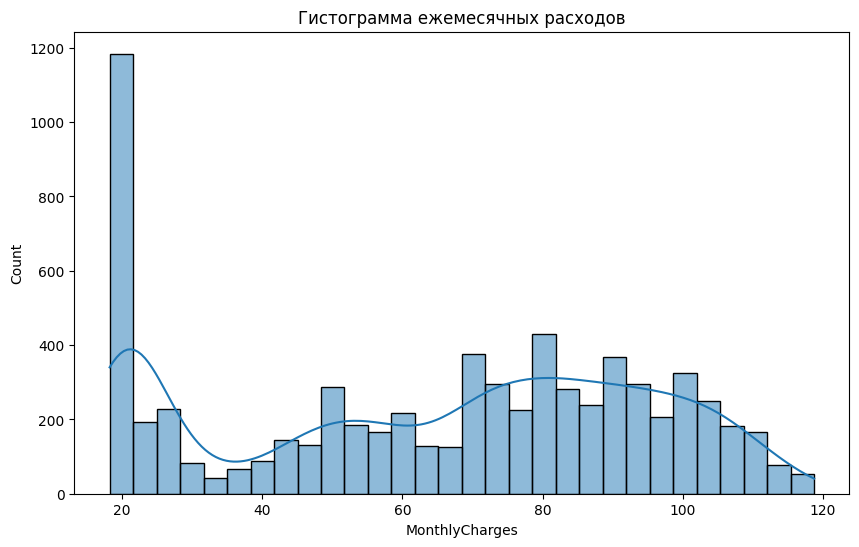

In [95]:
# Гистограмма для MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='MonthlyCharges', bins=30, kde=True)
plt.title('Гистограмма ежемесячных расходов')
plt.show()

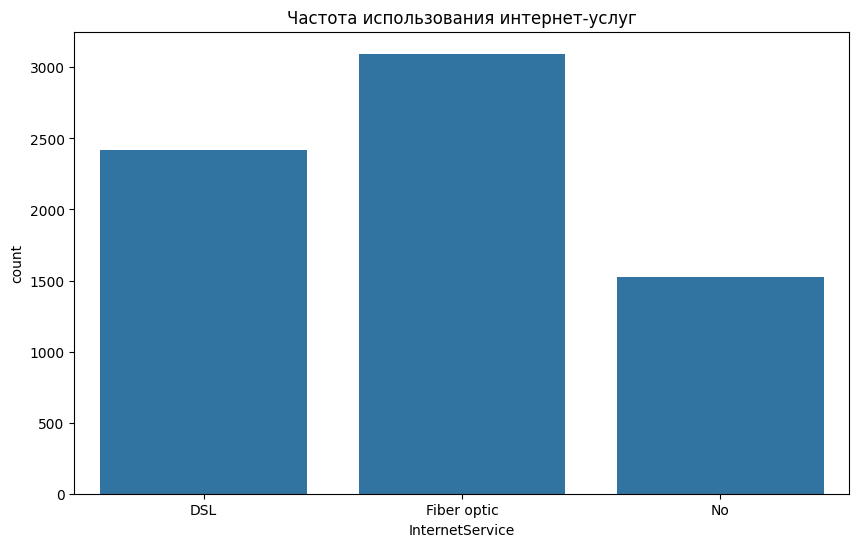

In [96]:
# Столбчатая диаграмма для InternetService
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='InternetService')
plt.title('Частота использования интернет-услуг')
plt.show()

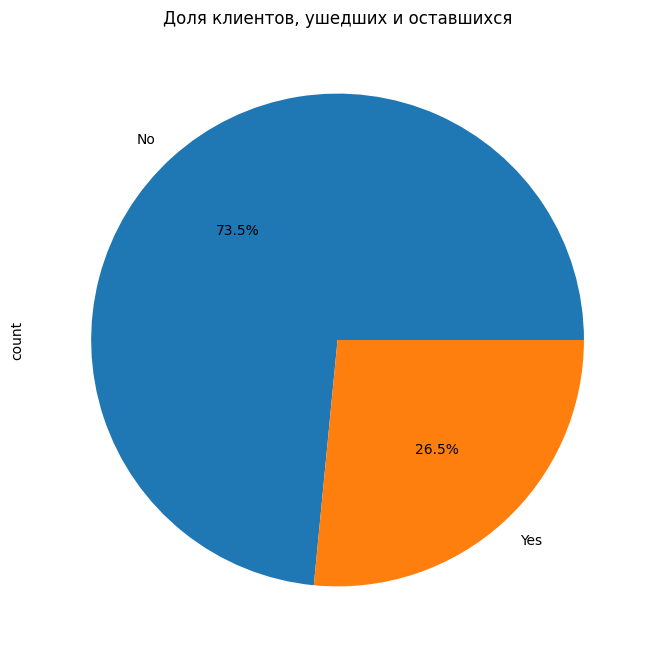

In [97]:
# Круговая диаграмма для Churn
plt.figure(figsize=(8, 8))
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Доля клиентов, ушедших и оставшихся')
plt.show()

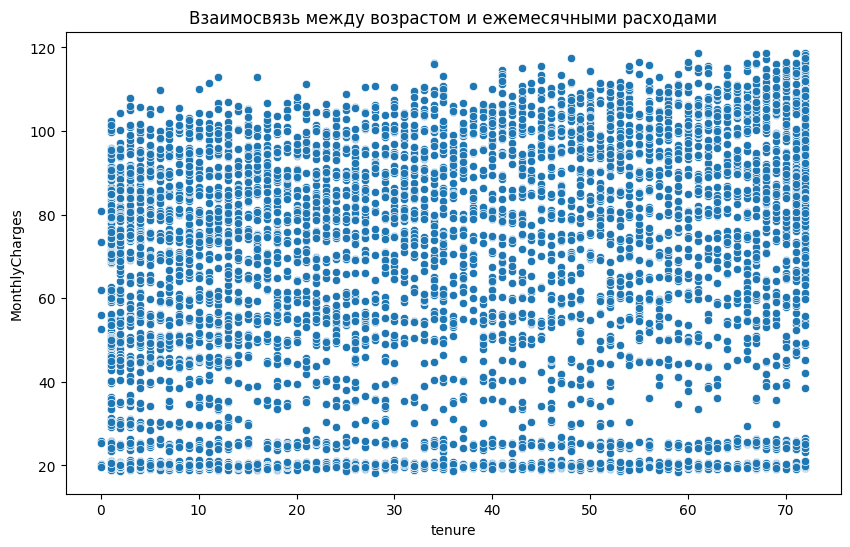

In [100]:
# Точечная диаграмма для tenure и MonthlyCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tenure', y='MonthlyCharges')
plt.title('Взаимосвязь между возрастом и ежемесячными расходами')
plt.show()

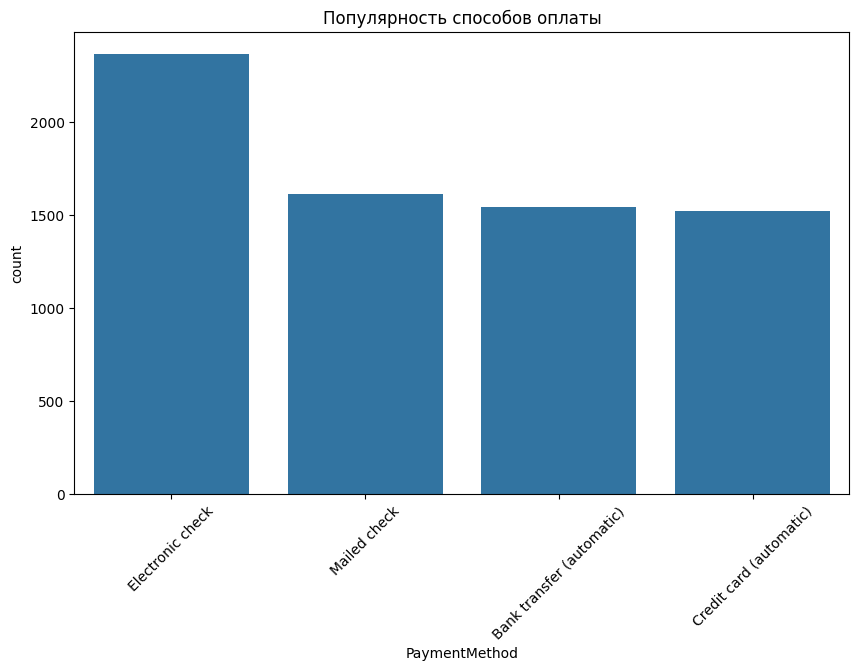

In [99]:
# Count plot для PaymentMethod
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PaymentMethod')
plt.title('Популярность способов оплаты')
plt.xticks(rotation=45)
plt.show()

Вывод:

Большая часть выборки имеет расходы в районе 20, при этом большое распределение выборки находится в диапозоне от 70 до 100ю
Большая часть выборки предпочитает использовать услуги fiber optic, при этом услуги DSL отстают незначительно.
Во взаимосвязи возраста и расходов прослеживается тенденция к росту доходов по мере увеличения возраста.
Доля ушедших клиентов составляет 26,5%
Большая часть клиентов предпочитает использовать электронный чек при оплате. Остальные способы оплаты примерно одинаковы в распределении. 

Пункт 3

In [2]:
# Преобразование TotalCharges в числовой тип
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Заполнение пропусков в TotalCharges средним значением
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

Пункт 4

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Выбираем нужные столбцы для нормализации
columns_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Инициализируем MinMaxScaler
scaler = MinMaxScaler()

# Применяем масштабирование по минимуму и максимуму к выбранным столбцам
data_normalized = data.copy()  # создаем копию данных
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

# Выводим первые 5 строк отнормированных данных для проверки
print(data_normalized.head())

   customerID  gender  SeniorCitizen Partner Dependents    tenure  \
0  7590-VHVEG  Female              0     Yes         No  0.013889   
1  5575-GNVDE    Male              0      No         No  0.472222   
2  3668-QPYBK    Male              0      No         No  0.027778   
3  7795-CFOCW    Male              0      No         No  0.625000   
4  9237-HQITU  Female              0      No         No  0.027778   

  PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0           No  No phone service             DSL             No  ...   
1          Yes                No             DSL            Yes  ...   
2          Yes                No             DSL            Yes  ...   
3           No  No phone service             DSL            Yes  ...   
4          Yes                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month

Пункт 5

In [17]:
data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
# Этап 3: Кодирование признаков
# Определение категориальных переменных
data_normalized = data_normalized.astype({'gender' : 'category', 
                                          'Partner' : 'category',
                                          'Dependents' : 'category',
                                          'PhoneService' : 'category',
                                          'MultipleLines' : 'category',
                                          'InternetService' : 'category',
                                          'OnlineSecurity' : 'category',
                                          'OnlineBackup' : 'category',
                                          'DeviceProtection' : 'category',
                                          'TechSupport' : 'category',
                                          'StreamingTV' : 'category',
                                          'StreamingMovies' : 'category',
                                          'Contract' : 'category',
                                          'PaperlessBilling' : 'category',
                                          'PaymentMethod' : 'category',
                                          'Churn' : 'category'
                })

data_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [75]:
# преобразование категориальных переменных в формат, подходящий к построению модели с помощью OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_cols = data_normalized.select_dtypes(include=['category']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

for col in categorical_cols:
    encoder_df = pd.DataFrame(encoder.fit_transform(data_normalized[[col]]))
    encoder_df.columns = encoder.get_feature_names_out(input_features=[col])
    data_normalized = data_normalized.join(encoder_df)
    data_normalized.drop(col, axis=1, inplace=True)

# Проверка получившегося результата
print(data_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   float64
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   float64
 5   gender_Male                              7043 non-null   float64
 6   Partner_No                               7043 non-null   float64
 7   Partner_Yes                              7043 non-null   float64
 8   Dependents_No                            7043 non-null   float64
 9   Dependents_Yes                           7043 non-null   float64
 10  PhoneService_No                          7043 no

Пункт 6

In [81]:
data_normalized.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)
# Разделение данных на признаки и целевую переменную
X = data_normalized.drop('Churn', axis=1)
y = data_normalized['Churn']

In [82]:
from sklearn.model_selection import train_test_split
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

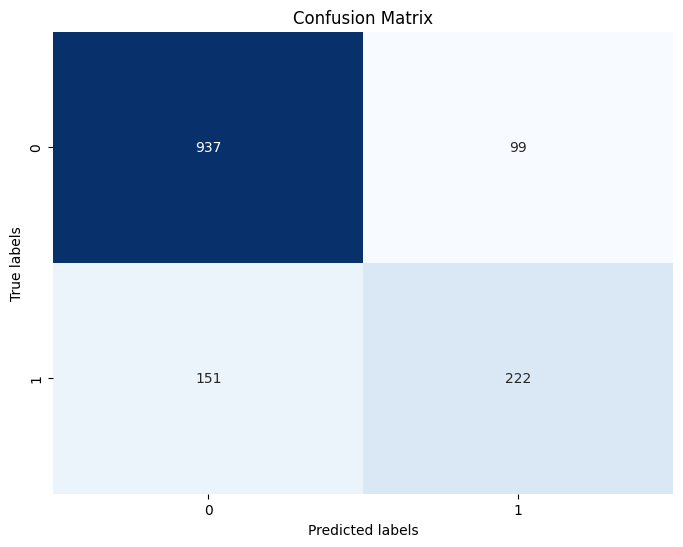

Accuracy: 0.8225691980127751
Precision: 0.6915887850467289
Recall: 0.5951742627345844
F1-score: 0.6397694524495677


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Инициализация модели логистической регрессии
model = LogisticRegression()

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка производительности модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Вывод:

1. Accuracy: 0.8225691980127751
Полученный показатель точности составляет примерно 82,3%, что в целом говорит о том, что модель правильно классифицирует около 82% всех объектов. Это хороший показатель, однако, для точной оценки модели нужно учитывать также и другие метрики.

2. Precision: 0.6915887850467289
Показатель точности равен примерно 69,2%, что указывает на то, что около 69% объектов, предсказанных моделью как положительные, действительно являются положительными. 

3. Recall: 0.5951742627345844
Значение полноты составляет около 59,5%, что означает, что модель правильно определяет примерно 59,5% всех истинно положительных объектов. 

4. F1-score: 0.6397694524495677
F1-мера равна примерно 0,64, что означает приоритет точности над полнотой.

Исходя из представленных метрик, можно сделать вывод, что модель имеет довольно хорошую общую точность классификации (Accuracy), за счет большего приоритета над полнотой, однако стоит уделить внимание улучшению показателей Precision, Recall и F1-score для более сбалансированного качества модели.

Пункт 7

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Разделение данных на признаки и целевую переменную
X = data_normalized.drop('TotalCharges', axis=1)
y = data_normalized['TotalCharges']

# Кодирование категориальных переменных перед построением модели
X_encoded = pd.get_dummies(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Вывод результатов
print(f"Коэффициент детерминации (R2): {r2}")
print(f"Среднеквадратичная ошибка (RMSE): {rmse}")

Коэффициент детерминации (R2): 0.9057602693944269
Среднеквадратичная ошибка (RMSE): 0.0807700843309745


c:\Users\БОСС\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Вывод:

1. Коэффициент детерминации (R2) равен 0.9057602693944269. Высокий коэффициент детерминации 0.906 свидетельствует о том, что модель хорошо соответствует данным и делает хорошие прогнозы.

2. Среднеквадратичная ошибка (RMSE) составляет 0.0807700843309745. Текущее значение RMSE показывает, что модель делает точные прогнозы с маленькой ошибкой.

Исходя из полученных результатов, можно утверждать, что построенная модель линейной регрессии хорошо соответствует данным и делает точные прогнозы относительно общих затрат. Результаты R2 и RMSE подтверждают хорошую точность модели.

Пункт 7

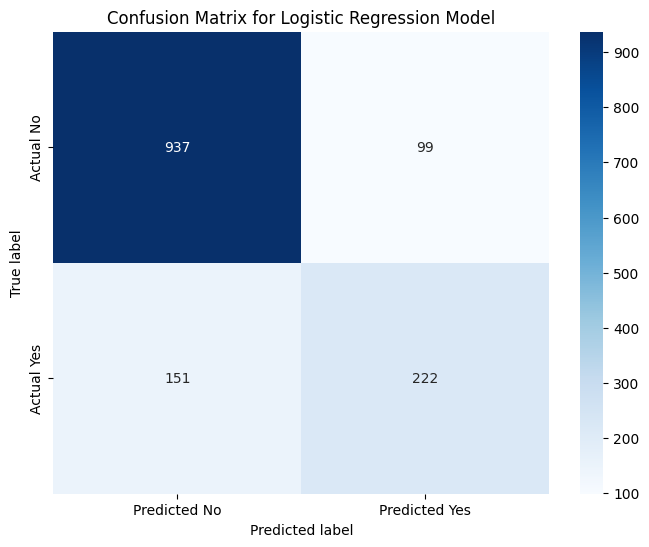

In [86]:
# Визуализация confusion matrix с помощью тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

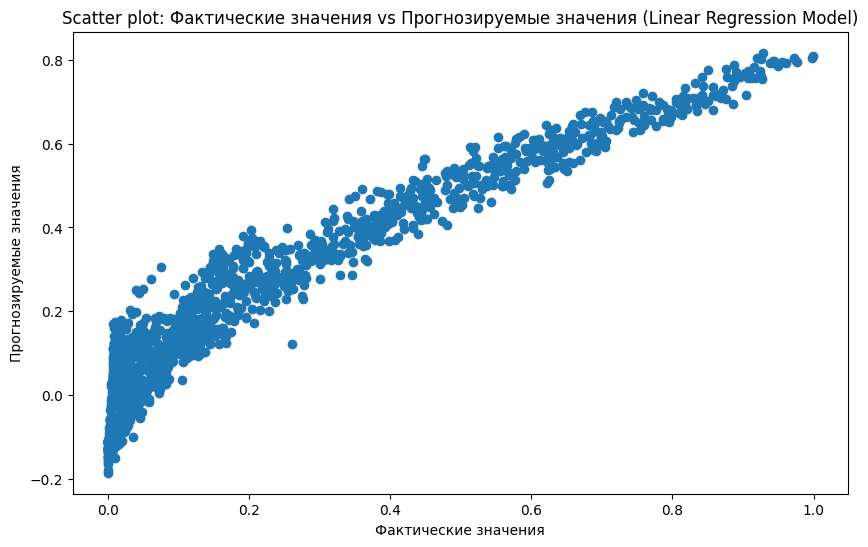

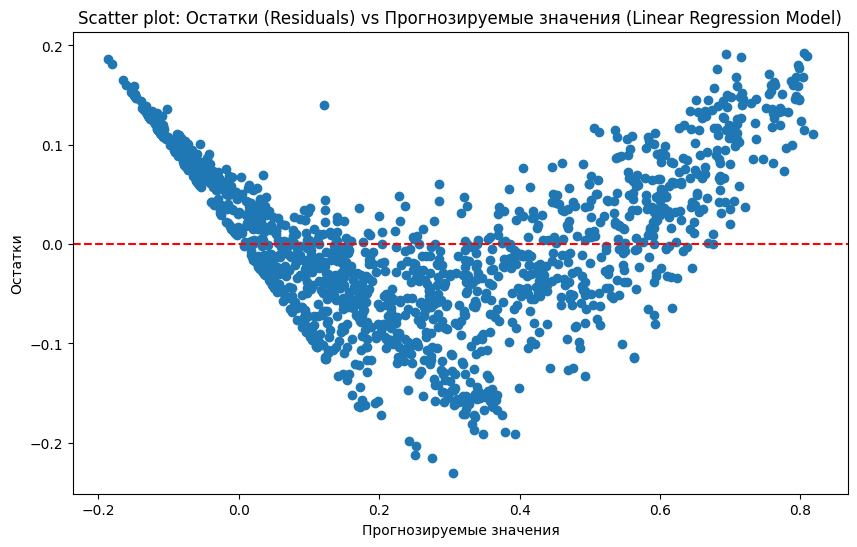

In [87]:
# Предсказание на тестовом наборе
y_pred_linear = model.predict(X_test)

# График фактических значений против прогнозируемых
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозируемые значения')
plt.title('Scatter plot: Фактические значения vs Прогнозируемые значения (Linear Regression Model)')
plt.show()

# График остатков для оценки точности модели
residuals = y_test - y_pred_linear
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Прогнозируемые значения')
plt.ylabel('Остатки')
plt.title('Scatter plot: Остатки (Residuals) vs Прогнозируемые значения (Linear Regression Model)')
plt.show()